<a href="https://colab.research.google.com/github/owilli38/Inventory-Mismatch-Unlocking-Hidden-Revenue-/blob/main/Visual_Analytics_Final_Project%2C_Heat_Map_of_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("Customer Ticket Analysis.csv")

In [ ]:
data.head()

,GroupValue,ZipCode,CityState,CustomerCount,PctOfTotal,CustomersMakingPurchase,PctOfCount,TotalSales,PctOfTotal.1,SalesPerCustomer,NumberOfTickets,TicketsPerCustomer,NumberOfItems,ItemsPerTicket,SalesYTD,PctOfTotal.2,SalesTTD,PctOfTotal.3
0,NaN,NaN,NaN,"32,844",60.24%,"21,712",66.1%,"4,970,549.84",58.82%,228.93,"42,714",1.97,"80,186",1.88,"1,278,777.20",77.14%,"6,566,744.14",44.87%
1,NaN,NaN,NaN,3,0.01%,0,0.0%,0.00,0.00%,0.00,0,0.00,0,0.00,0.00,0.00%,920.68,0.01%
2,01075,01075,"SOUTH HADLEY,MA",1,0.00%,0,0.0%,0.00,0.00%,0.00,0,0.00,0,0.00,0.00,0.00%,80.00,0.00%
3,01085,01085,"WESTFIELD,MA",1,0.00%,1,100.0%,280.00,0.00%,280.00,1,1.00,3,3.00,0.00,0.00%,665.00,0.00%
4,01521,01521,"HOLLAND,MA",1,0.00%,1,100.0%,150.00,0.00%,150.00,1,1.00,1,1.00,0.00,0.00%,150.00,0.00%


In [ ]:
mapdata = data[["ZipCode", "CustomersMakingPurchase", "TotalSales"]]

In [ ]:
mapdata.isnull().sum()

,0
ZipCode,2
CustomersMakingPurchase,0
TotalSales,0


In [ ]:
mapdata_cleaned = mapdata.dropna(subset=['ZipCode']).copy()
print(f"Number of rows before dropping nulls: {len(mapdata)}")
print(f"Number of rows after dropping nulls: {len(mapdata_cleaned)}")

Number of rows before dropping nulls: 1112
Number of rows after dropping nulls: 1110


In [ ]:
mapdata_cleaned.isnull().sum()

,0
ZipCode,0
CustomersMakingPurchase,0
TotalSales,0


In [ ]:
mapdata_cleaned['CustomersMakingPurchase'] = mapdata_cleaned['CustomersMakingPurchase'].astype(str).str.replace(',', '').astype(int)
mapdata_cleaned['TotalSales'] = mapdata_cleaned['TotalSales'].astype(str).str.replace(',', '').astype(float)

print("Data types after conversion:")
print(mapdata_cleaned.dtypes)

Data types after conversion:
ZipCode                     object
CustomersMakingPurchase      int64
TotalSales                 float64
dtype: object


In [ ]:
filtered_data = mapdata_cleaned[mapdata_cleaned['CustomersMakingPurchase'] >= 5].copy()
print("First 5 rows of the filtered data:")
print(filtered_data.head())

First 5 rows of the filtered data:
    ZipCode  CustomersMakingPurchase  TotalSales
287   27013                        5      926.00
369   27609                        5      646.67
396   28001                        6     1196.00
397   28006                        8     3898.92
401   28012                       20     4399.00


In [ ]:
aggregated_sales = filtered_data.groupby('ZipCode')['TotalSales'].sum().reset_index()
print("Aggregated Sales by ZipCode (first 5 rows):")
print(aggregated_sales.head())

Aggregated Sales by ZipCode (first 5 rows):
  ZipCode  TotalSales
0   27013      926.00
1   27609      646.67
2   28001     1196.00
3   28006     3898.92
4   28012     4399.00


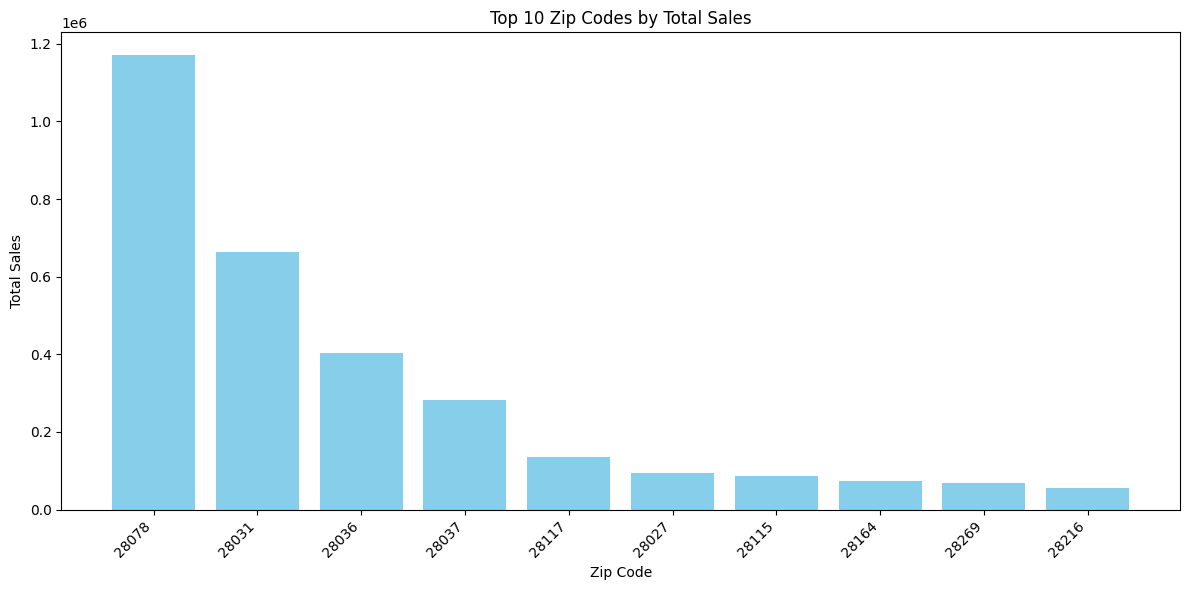

In [ ]:
top_zip_codes = aggregated_sales.sort_values(by='TotalSales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_zip_codes['ZipCode'], top_zip_codes['TotalSales'], color='skyblue')
plt.title('Top 10 Zip Codes by Total Sales')
plt.xlabel('Zip Code')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import sys
!{sys.executable} -m pip install geopandas
print("geopandas installed and ready.")

geopandas installed and ready.


**Reasoning**:
Now that geopandas is confirmed to be installed, the next step is to import the library, load the GeoJSON file into a GeoDataFrame, and then display its head and data types to inspect its structure, as requested by the subtask.



In [ ]:
import geopandas as gpd

north_carolina_geo_df = gpd.read_file('nc_north_carolina_zip_codes_geo.min.json')

print("First 5 rows of north_carolina_geo_df:")
print(north_carolina_geo_df.head())
print("\nData types of north_carolina_geo_df:")
print(north_carolina_geo_df.dtypes)

First 5 rows of north_carolina_geo_df:
  STATEFP10 ZCTA5CE10  GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  \
0        37     27312  3727312        B5   G6350          S  440057980   
1        37     28636  3728636        B5   G6350          S  154127455   
2        37     28630  3728630        B5   G6350          S  155404170   
3        37     28644  3728644        B5   G6350          S  177195022   
4        37     28119  3728119        B5   G6350          S  170920359   

   AWATER10   INTPTLAT10    INTPTLON10 PARTFLG10  \
0  17272044  +35.7556808  -079.2100664         N   
1    388119  +35.9394262  -081.0634332         N   
2   5345270  +35.8271693  -081.4216573         N   
3    770171  +36.4262247  -081.2779763         N   
4    839760  +34.8510779  -080.0169854         N   

                                            geometry  
0  POLYGON ((-79.31375 35.75193, -79.31592 35.754...  
1  POLYGON ((-81.12383 35.95282, -81.12379 35.952...  
2  POLYGON ((-81.50942 35.80077, -81.5

In [ ]:
aggregated_sales['ZipCode'] = aggregated_sales['ZipCode'].astype(str)

merged_geo_df = north_carolina_geo_df.merge(aggregated_sales, left_on='ZCTA5CE10', right_on='ZipCode', how='inner')

print("First 5 rows of the merged_geo_df:")
print(merged_geo_df.head())

print("\nData types of merged_geo_df:")
print(merged_geo_df.dtypes)

First 5 rows of the merged_geo_df:
  STATEFP10 ZCTA5CE10  GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  \
0        37     28117  3728117        B5   G6350          S  103356776   
1        37     27013  3727013        B5   G6350          S  195373700   
2        37     28001  3728001        B5   G6350          S  344382730   
3        37     28081  3728081        B5   G6350          S   78789539   
4        37     28027  3728027        B5   G6350          S  177682005   

   AWATER10   INTPTLAT10    INTPTLON10 PARTFLG10  \
0  41221105  +35.5656976  -080.8983325         N   
1    295666  +35.7504917  -080.7000786         N   
2   4510803  +35.3385785  -080.2081790         N   
3   1107303  +35.5028157  -080.6701730         N   
4   5103808  +35.4080647  -080.6822003         N   

                                            geometry ZipCode  TotalSales  
0  POLYGON ((-80.87659 35.64549, -80.87292 35.645...   28117   136170.24  
1  POLYGON ((-80.64068 35.71774, -80.64043 35.717...   27

In [ ]:
import folium
import geopandas as gpd

# Ensure merged_geo_df has a CRS defined, assuming WGS84 (EPSG:4326) if not.
if merged_geo_df.crs is None:
    merged_geo_df = merged_geo_df.set_crs("EPSG:4326", allow_override=True)

# Reproject to a projected CRS (e.g., Web Mercator) for accurate centroid calculation.
# This removes the UserWarning related to calculating centroids in a geographic CRS.
merged_geo_df_proj = merged_geo_df.to_crs(epsg=3857)

# Calculate the mean centroid of the projected geometries
center_lat_proj = merged_geo_df_proj.geometry.centroid.y.mean()
center_lon_proj = merged_geo_df_proj.geometry.centroid.x.mean()

# Create a shapely Point from the projected centroid
from shapely.geometry import Point
projected_center_point = Point(center_lon_proj, center_lat_proj)

# Convert the projected centroid point back to a geographic CRS (WGS84 - EPSG:4326) for folium
geographic_center_point_series = gpd.GeoSeries([projected_center_point], crs=3857).to_crs(epsg=4326)
center_lat = geographic_center_point_series.y.iloc[0]
center_lon = geographic_center_point_series.x.iloc[0]

# Create a base folium map centered on North Carolina
m = folium.Map(location=[center_lat, center_lon], zoom_start=7)

# Add the choropleth layer
folium.Choropleth(
    geo_data=merged_geo_df.to_json(), # Use the original geographic GeoDataFrame for plotting
    data=merged_geo_df,
    columns=['ZipCode', 'TotalSales'],
    key_on='feature.properties.ZipCode',
    fill_color='YlGnBu',  # Choose a color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Sales in USD',
    highlight=True,
    tooltip=folium.features.GeoJsonTooltip(fields=['ZipCode', 'TotalSales'],
                                           aliases=['Zip Code:', 'Total Sales:'],
                                           localize=True)
).add_to(m)

# Display the map
m

In [ ]:
top_10_sales_zip_codes = merged_geo_df.sort_values(by='TotalSales', ascending=False).head(10)[['ZipCode', 'TotalSales']]
print("Top 10 Zip Codes by Total Sales:")
print(top_10_sales_zip_codes)

Top 10 Zip Codes by Total Sales:
   ZipCode  TotalSales
5    28078  1170874.15
21   28031   664479.15
18   28036   404400.35
20   28037   282296.86
0    28117   136170.24
4    28027    94164.90
32   28115    86673.03
8    28164    74388.33
17   28269    67524.79
34   28216    55424.20
